# Boosting with Sklearn

This notebook provides a comprehensive guide on implementing Classification using scikit-learn libraries.

By: Bryce Li, NUS

# Boosting

Boosting algorithms are a set of the low accurate classifier to create a highly accurate classifier. Low accuracy classifier (or weak classifier) offers the accuracy better than the flipping of a coin. Highly accurate classifier( or strong classifier) offer error rate close to 0. Boosting algorithm can track the model who failed the accurate prediction. Boosting algorithms are less affected by the overfitting problem. The following three algorithms have gained massive popularity in data science competitions.

* AdaBoost (Adaptive Boosting)
* Gradient Tree Boosting
* XGBoost

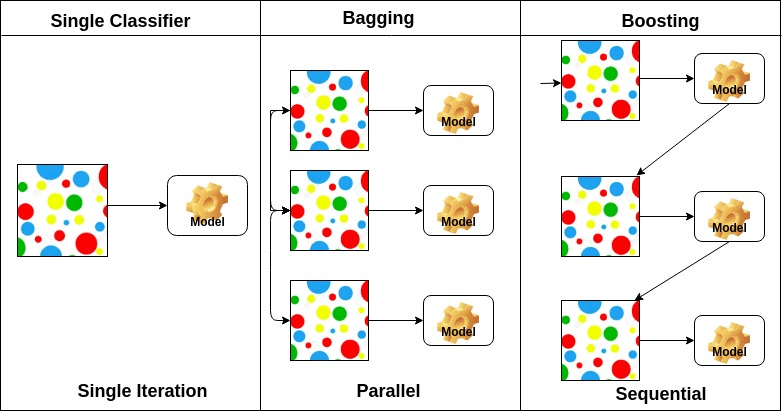

# AdaBoost Classifier
Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

* The classifier should be trained interactively on various weighed training examples.
* In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

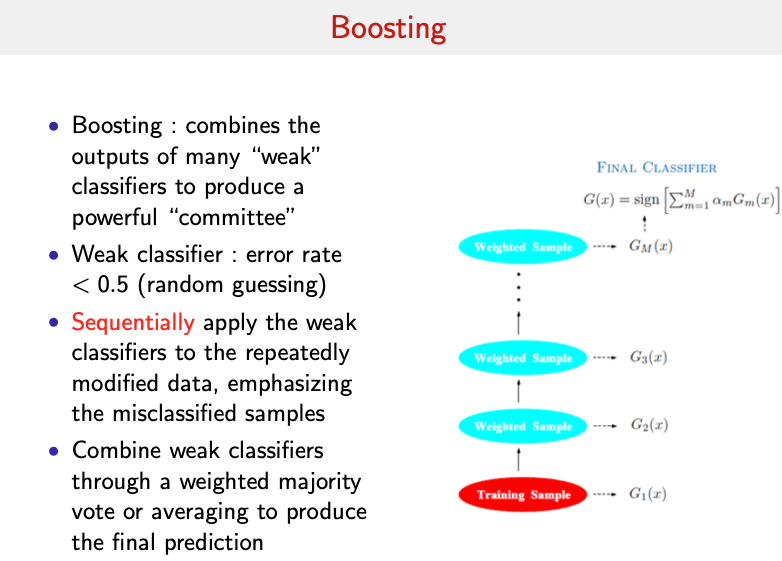

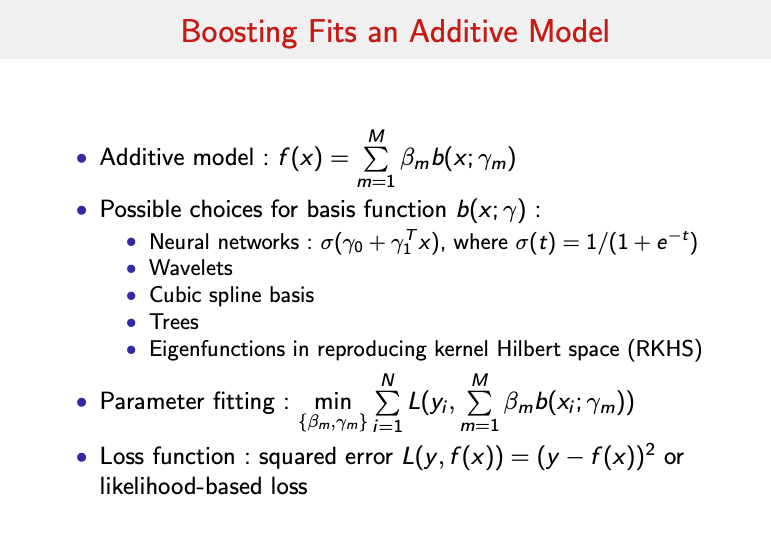

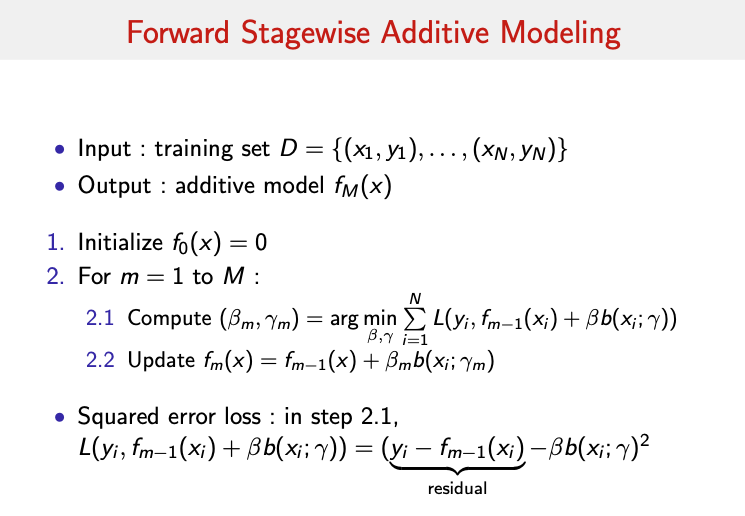

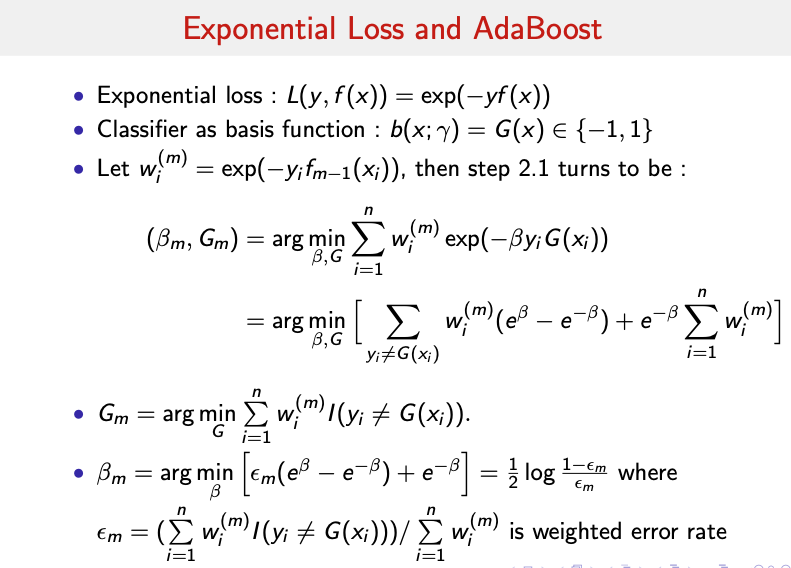

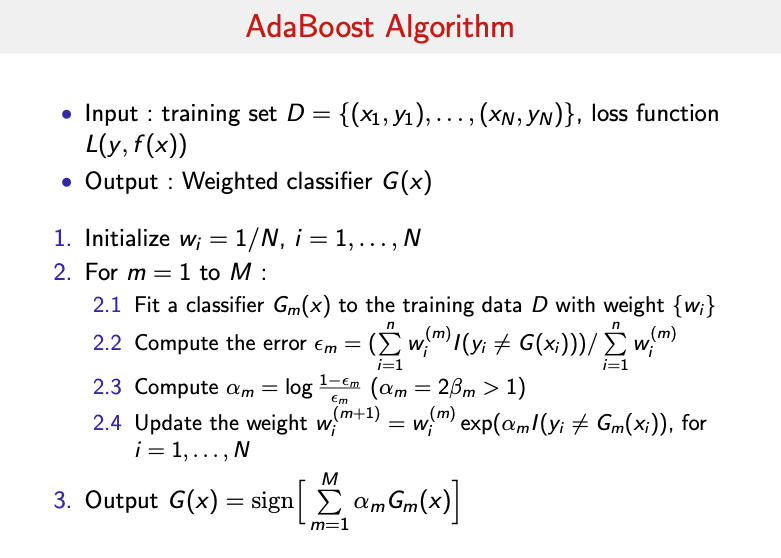

## Without Adaboost

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

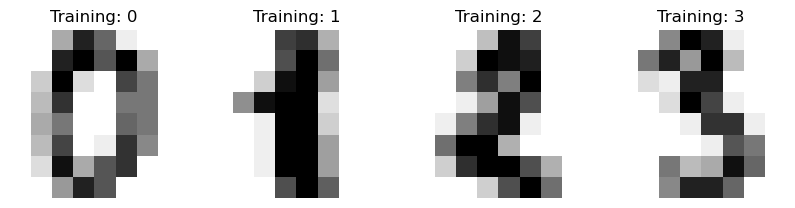

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
from sklearn.tree import DecisionTreeRegressor as D_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))



# clf=MultinomialNB()
# clf=SVC(probability=True, kernel='linear')

clf=D_tree()
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

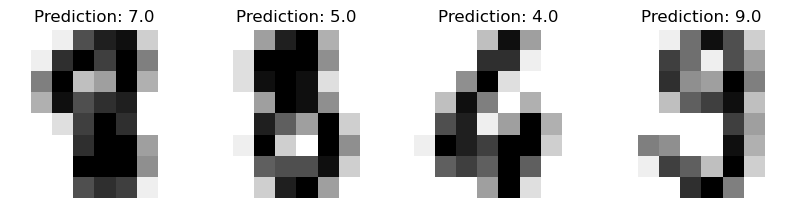

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [5]:
def output_report(y_test, y_pred):
    print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    # disp.figure_.suptitle("Confusion Matrix")
    # print(f"Confusion matrix:\n{disp.confusion_matrix}")

    plt.show()
    return None

Classification report for classifier DecisionTreeRegressor():
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        88
           1       0.83      0.71      0.77        91
           2       0.74      0.72      0.73        86
           3       0.58      0.58      0.58        91
           4       0.85      0.70      0.77        92
           5       0.65      0.60      0.62        91
           6       0.87      0.84      0.85        91
           7       0.65      0.69      0.67        89
           8       0.45      0.48      0.46        88
           9       0.55      0.63      0.59        92

    accuracy                           0.69       899
   macro avg       0.69      0.69      0.69       899
weighted avg       0.69      0.69      0.69       899




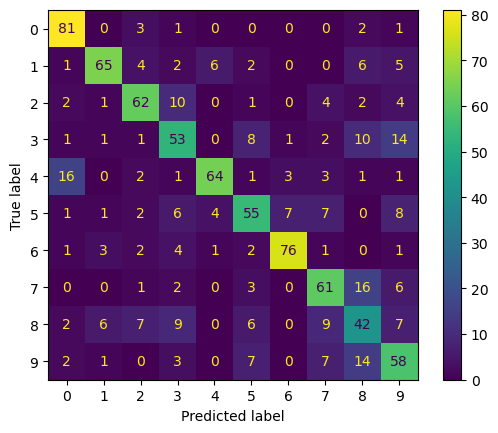

In [6]:
output_report(y_test, predicted)

## With Adaboost

In [7]:
from sklearn.ensemble import AdaBoostClassifier

In [8]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,estimator=SVC(probability=True, kernel='linear'),algorithm='SAMME.R',
                         learning_rate=1)


In [9]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,algorithm='SAMME',
                         learning_rate=1)


In [10]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

Classification report for classifier DecisionTreeRegressor():
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.66      0.58      0.62        91
           2       0.83      0.74      0.79        86
           3       0.83      0.60      0.70        91
           4       0.92      0.61      0.73        92
           5       0.90      0.81      0.86        91
           6       0.81      0.87      0.84        91
           7       0.79      0.87      0.82        89
           8       0.47      0.84      0.60        88
           9       0.85      0.82      0.83        92

    accuracy                           0.77       899
   macro avg       0.80      0.77      0.78       899
weighted avg       0.80      0.77      0.78       899




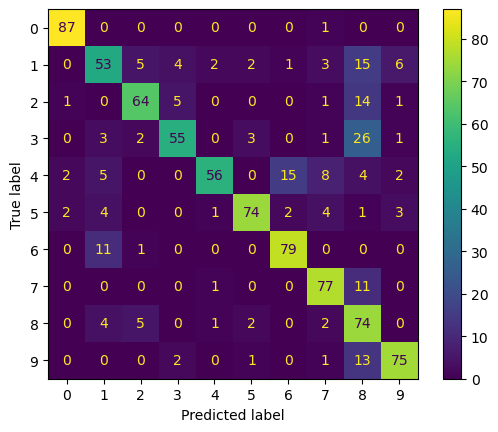

In [11]:
output_report(y_test, y_pred)

# Gradient Boosting Decision Trees (GBDT)

GBDT iterates over a series of decision trees, where each tree is trained to correct the errors of the previous one. The key ideas are:

* Gradient Descent: GBDT uses gradient descent to optimize the ensemble by minimizing a loss function. It computes the gradient (derivative) of the loss function and uses it to guide the learning process.
* Boosting: Each new tree focuses on the residual errors from the previous trees, effectively learning from the mistakes of earlier iterations.
* Decision Trees: The weak learners in GBDT are usually decision trees. The trees are trained in sequence, with each new tree aiming to reduce the overall error.

## Key Features
* Additive Learning: GBDT constructs the ensemble in an additive manner, adding new trees to the ensemble to improve performance.
* Weighted Samples: Each new tree pays more attention to samples that were misclassified by previous trees, giving them higher weights.
* Loss Function: GBDT can use various loss functions, depending on the task (e.g., mean squared error for regression, log loss for classification).

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Create a simple dataset
# X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_clusters_per_class=1)

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the Gradient Boosting Classifier
gbdt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gbdt_clf.fit(X_train, y_train)

# Test the classifier
y_pred = gbdt_clf.predict(X_test)

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9043381535038932


## Advanced Variants
* XGBoost: An optimized and highly efficient implementation of GBDT, with additional features like early stopping and regularization.
* LightGBM: A fast implementation with support for large datasets and parallel training.
* CatBoost: Tailored for categorical data with efficient handling of categorical features.

## XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and widely used open-source implementation of Gradient Boosting Decision Trees (GBDT). It is known for its speed, efficiency, and flexibility in various machine learning tasks, particularly in supervised learning like classification and regression. Let's explore XGBoost in detail, covering its key features, common applications, and how to implement it in code.

Key Features of XGBoost
XGBoost provides several advanced features that distinguish it from other GBDT implementations:
- Regularization: XGBoost offers both L1 and L2 regularization, reducing the risk of overfitting. This feature enhances its ability to generalize on unseen data.
- Parallel Processing: XGBoost supports parallel training, making it faster than traditional GBDT implementations. It can leverage multiple cores to speed up training.
- Handling Missing Data:XGBoost automatically handles missing data, allowing it to make predictions even with incomplete datasets.
- Custom Objective Functions: XGBoost allows users to define custom loss functions, providing flexibility to adapt to specific tasks.
- Tree Pruning: XGBoost uses a depth-first tree pruning method called "max depth", which allows it to terminate splits earlier when they do not improve the performance, saving computation time.
- Cross-Validation and Early Stopping: XGBoost includes built-in support for cross-validation and early stopping, enabling model tuning and preventing overfitting.
- Boosting Approaches: XGBoost supports multiple boosting approaches, including gradient boosting and dart (Dropouts meet Multiple Additive Regression Trees).

In [13]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Create a simple dataset
# X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_clusters_per_class=1)

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Test the classifier
y_pred = xgb_clf.predict(X_test)

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.899888765294772


## LightGBM

LightGBM is a high-performance, distributed, and fast gradient boosting framework designed for efficient training and scalability, especially with large datasets. Developed by Microsoft, it is known for its speed and low memory consumption, making it popular in machine learning competitions and real-world applications. Let's dive into what makes LightGBM unique, its key features, and how to use it in practice.

Key Features of LightGBM
LightGBM has several distinctive characteristics that contribute to its efficiency and performance:
- Histogram-Based Learning: LightGBM uses a histogram-based approach, which reduces memory usage and speeds up training by grouping feature values into discrete bins.
- Leaf-Wise Growth: Unlike other gradient boosting frameworks that grow trees level-wise, LightGBM grows trees leaf-wise, allowing for deeper and potentially more accurate trees. This can lead to faster convergence and better performance, although it can also increase the risk of overfitting.
- Parallel and Distributed Learning: LightGBM supports parallel training, making it faster on multi-core processors. It also supports distributed learning for large-scale datasets.
- Feature Bundling: LightGBM can combine low-cardinality features into a single feature, reducing the number of unique splits and further improving training speed.
- Efficient Handling of Sparse Data: LightGBM is optimized to work with sparse data, making it suitable for datasets with many missing or zero values.

In [14]:
import lightgbm as lgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a simple dataset
# X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_clusters_per_class=1)

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

# Train the classifier
lgb_clf.fit(X_train, y_train)

# Test the classifier
y_pred = lgb_clf.predict(X_test)

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 898, number of used features: 52
[LightGBM] [Info] Start training from score -2.300360
[LightGBM] [Info] Start training from score -2.289311
[LightGBM] [Info] Start training from score -2.289311
[LightGBM] [Info] Start training from score -2.278381
[LightGBM] [Info] Start training from score -2.311534
[LightGBM] [Info] Start training from score -2.289311
[LightGBM] [Info] Start training from score -2.300360
[LightGBM] [Info] Start training from score -2.300360
[LightGBM] [Info] Start training from score -2.345823
[LightGBM] [Info] Start training from score -2.322833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

## Practice


In [18]:
import pandas as pd

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
# reading the datat set
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
df['Cancer'] = data.target